## Data Analysis and Visualization - TOPIC: Top 100 Bestselling Book Reviews on Amazon

In [274]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
# reading two csv files
book_titles = pd.read_csv('C:\\Users\\Iva\\Desktop\\Data Analysis ვიწყებთ თავიდან\\Datasets\Kaggle\\TOP 100 Bestselling Book Reviews on AMAZON\\book titles.csv')
customer_reviews = pd.read_csv('C:\\Users\\Iva\\Desktop\\Data Analysis ვიწყებთ თავიდან\\Datasets\Kaggle\\TOP 100 Bestselling Book Reviews on AMAZON\\customer reviews.csv')


In [276]:
# overview of how data looks like
book_titles.head()

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...


In [277]:
# overview of how data looks like
customer_reviews.head()
# book title & book name should be used for join purposes

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048


In [278]:
# general overview of standard statistical numbers
book_titles.describe()

,Rank,book price,rating,year of publication
count,100.000000,100.000000,97.000000,100.00000
mean,50.500000,12.708600,4.689691,2013.76000
std,29.011492,7.915568,0.181133,15.13049
min,1.000000,2.780000,4.100000,1947.00000
25%,25.750000,6.302500,4.600000,2014.00000
50%,50.500000,11.480000,4.700000,2019.00000
75%,75.250000,16.990000,4.800000,2023.00000
max,100.000000,48.770000,5.000000,2024.00000


In [279]:
# general overview of standard statistical numbers
customer_reviews.describe()

,Sno,reviewer rating
count,920.000000,920.000000
mean,459.500000,4.826087
std,265.725422,0.432839
min,0.000000,2.000000
25%,229.750000,5.000000
50%,459.500000,5.000000
75%,689.250000,5.000000
max,919.000000,5.000000


In [280]:
book_titles.info()
# in rating column there are 3 missing values

# data memory usage is only 6.4kb. but still good to change Dtypes in order to make size shorter and code execution process faster

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 100 non-null    int64  
 1   book title           100 non-null    object 
 2   book price           100 non-null    float64
 3   rating               97 non-null     float64
 4   author               100 non-null    object 
 5   year of publication  100 non-null    int64  
 6   genre                100 non-null    object 
 7   url                  100 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


In [281]:
book_titles[book_titles['rating'].isnull()]
# Rank [25, 46, 86] has no rating.

,Rank,book title,book price,rating,author,year of publication,genre,url
24,25,"House of Flame and Shadow (Crescent City, 3)",18.48,NaN,Sarah J. Maas,2023,"Fantasy, Dragons, Young Adult, Fiction, High F...",amazon.com/House-Flame-Shadow-Crescent-City/dp...
45,46,"How to Be the Love You Seek: Break Cycles, Fin...",20.11,NaN,Nicole LePera,2023,"Self Help, Nonfiction, Mental Health, Psycholo...",amazon.com/How-Love-You-Seek-Relationships/dp/...
85,86,Love Comes First,17.99,NaN,Emily Giffin,2016,"Fiction, Romance, Contemporary, Audiobook, Adu...",amazon.com/Love-Comes-First-Jenna-Hager/dp/031...


In [282]:
# removing rows with NaN in ratings
book_titles = book_titles[~book_titles['rating'].isnull()]
book_titles.head()

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...


In [283]:
# renaming year of publication column with year and checking if it was changed
book_titles.rename(columns={'year of publication':'year'},inplace=True)
book_titles.head(n=3)

,Rank,book title,book price,rating,author,year,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...


In [284]:
# checking dtypes for possible change
book_titles.dtypes

Rank            int64
book title     object
book price    float64
rating        float64
author         object
year            int64
genre          object
url            object
dtype: object

In [285]:
# updated dtypes for two columns for memory usage
book_titles[['Rank','year']] = book_titles[['Rank','year']].astype('int16')

#checking reduced memory usage
book_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        97 non-null     int16  
 1   book title  97 non-null     object 
 2   book price  97 non-null     float64
 3   rating      97 non-null     float64
 4   author      97 non-null     object 
 5   year        97 non-null     int16  
 6   genre       97 non-null     object 
 7   url         97 non-null     object 
dtypes: float64(2), int16(2), object(4)
memory usage: 5.7+ KB


In [287]:
# 0 missing value
customer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sno                 920 non-null    int64 
 1   book name           920 non-null    object
 2   review title        920 non-null    object
 3   reviewer            920 non-null    object
 4   reviewer rating     920 non-null    int64 
 5   review description  920 non-null    object
 6   is_verified         920 non-null    bool  
 7   date                920 non-null    object
 8   timestamp           920 non-null    object
 9   ASIN                920 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 65.7+ KB


In [288]:
# assigning datetime type for date column
customer_reviews['date'] = pd.to_datetime(customer_reviews['date'], format ='%d-%m-%Y')

In [289]:
# extracting year, month, day from date and removing date column
customer_reviews['year'] = customer_reviews['date'].dt.year
customer_reviews['month'] = customer_reviews['date'].dt.month
customer_reviews['day'] = customer_reviews['date'].dt.day
customer_reviews.drop(columns={'date'},inplace=True)

## VISUALIZATION

* TOP 10 HIGHEST PRICED BOOKS

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A Court of Thorns and Roses Paperback Box Set (5 books)'),
  Text(1, 0, 'Harry Potter Paperback Box Set (Books 1-7)'),
  Text(2, 0, 'My Name Is Barbra'),
  Text(3, 0, 'Unwoke: How to Defeat Cultural Marxism in America'),
  Text(4, 0, 'Harry Potter and the Prisoner of Azkaban (Harry Potter, Book 3) (MinaLima Edition)'),
  Text(5, 0, 'Friends, Lovers, and the Big Terrible Thing: A Memoir'),
  Text(6, 0, 'Murtagh: The World of Eragon (The Inheritance Cycle)'),
  Text(7, 0, 'Hidden Potential: The Science of Achieving Greater Things'),
  Text(8, 0, 'Elon Musk'),
  Text(9, 0, 'Resurrection Walk (Lincoln Lawyer)')])

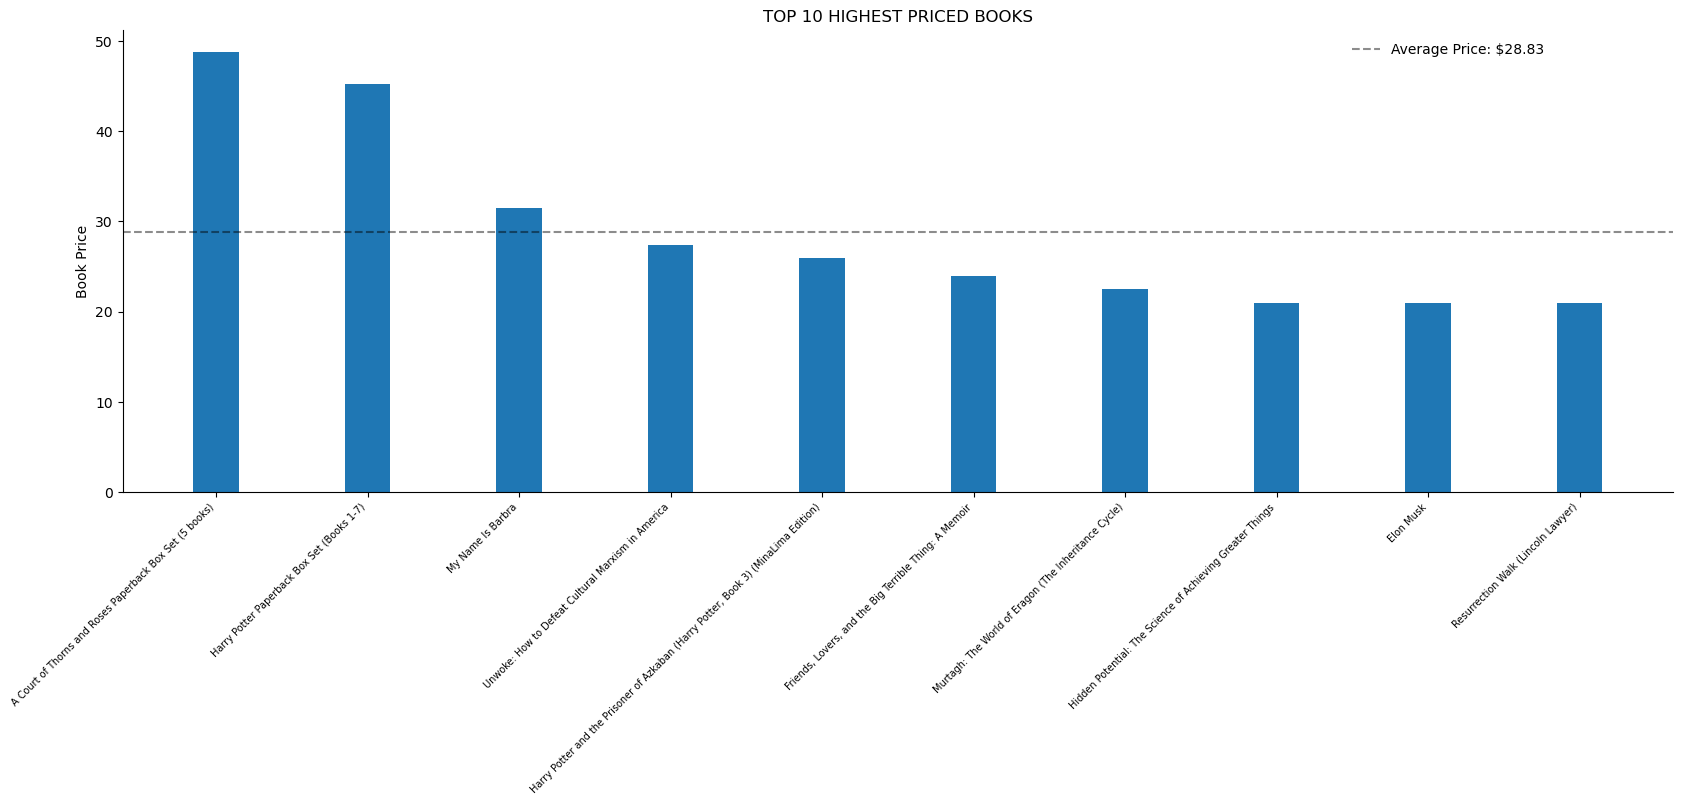

In [388]:
book_titles_top10 = book_titles[['book title', 'book price','rating']].sort_values(by='book price',ascending=False).iloc[:10].set_index('book title')

# created average value of book price to use for axhline
top10_average = sum(book_titles_top10['book price']) / len(book_titles_top10['book price'])

fig, ax = plt.subplots(figsize=(20,6))

ax.bar(book_titles_top10.index,book_titles_top10['book price'],width=.3)
ax.set_ylabel('Book Price')
ax.set_title('TOP 10 HIGHEST PRICED BOOKS')

ax.axhline(y=top10_average, linestyle='--', color='black',label=f'Average Price: ${top10_average:.2f}', alpha=.45)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False,bbox_to_anchor = (.925,1))
plt.xticks(rotation=45, ha='right',fontsize=7)

# BRIEF SUMMARY 

# There are only 3 book above average price
# Out of that 3 books 2 book consists several series

* TOP 10 HIGHEST PRICED BOOKS WITH RATINGS

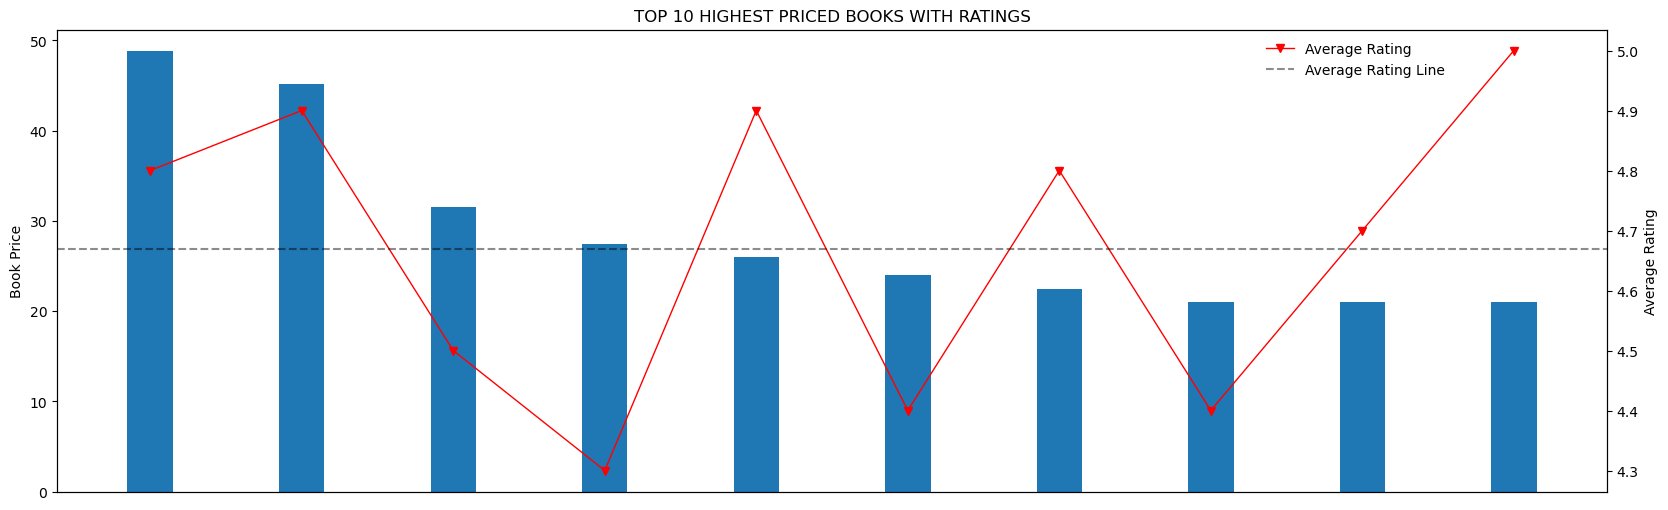

In [441]:
top10_average = book_titles_top10['rating'].mean()

fig, ax = plt.subplots(figsize=(20, 6))

ax.bar(book_titles_top10.index, book_titles_top10['book price'], width=0.3)
ax.set_ylabel('Book Price')
ax.set_title('TOP 10 HIGHEST PRICED BOOKS WITH RATINGS')



ax2 = ax.twinx()
ax2.plot(book_titles_top10.index, book_titles_top10['rating'].values, color='red', marker='v', linestyle='-', linewidth=1, label='Average Rating')
ax2.set_ylabel('Average Rating')

plt.axhline(top10_average, linestyle='--', color='black', label='Average Rating Line', alpha=0.45)

ax.set_xticks([])
ax.set_xticklabels([])

fig.legend(frameon=False,bbox_to_anchor = (.825,.88))

# BRIEF SUMMARY

# 6 out of 10 top highest priced books are above average rating
# more than 50% of the books are more than average

In [462]:
# install squarify for Treemap
pip install squarify

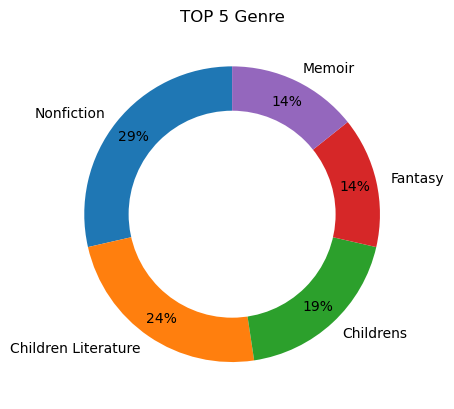

In [519]:
fig, ax = plt.subplots()

ax.pie(x=genre_top5['genre'],
       startangle=90,
       labels=['Nonfiction','Children Literature','Childrens','Fantasy','Memoir'],
       autopct='%.0f%%',
      pctdistance=.85) # percentage distance was moved clsoer to edge by definingi t to 85 %
ax.set_title('TOP 5 Genre')

# WE HHAVE TO CREATE WHITE HOLE

donut_hole = plt.Circle((0,0), 0.7, fc='white') # created circle with radius from 0 to 7
fig = plt.gcf()

fig.gca().add_artist(donut_hole)

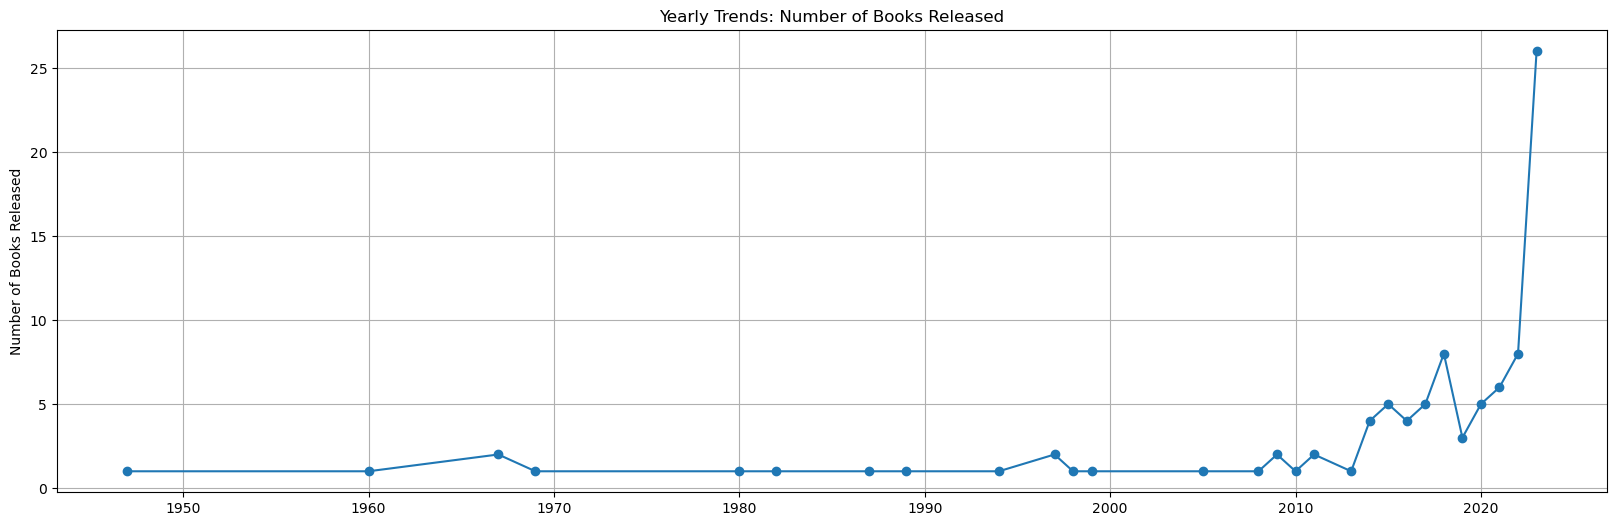

In [520]:
yearly_counts = book_titles.groupby('year').size()
yearly_counts = yearly_counts[:-1]

plt.figure(figsize=(20, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Yearly Trends: Number of Books Released')
plt.ylabel('Number of Books Released')
plt.grid(True)
plt.show()

# BRIEF SUMMARY

# most of the books were published after 2010
# maximum books released in a year was 26 books in 2023

* CORRELATION

<Axes: >

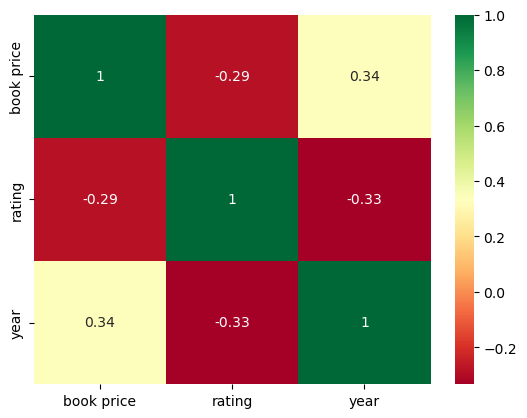

In [535]:
correlation = book_titles.corr(numeric_only=True).iloc[1:,1:]
sns.heatmap(
    correlation, 
    cmap="RdYlGn", 
    annot=True)

# BRIEF SUMMARY

# New the book is the more price is but not significantly
# higher rating book gets less price it becomes and opposite
# only positiv correlation is between book price and year

* SCATTER PLOT (Rating & Price)

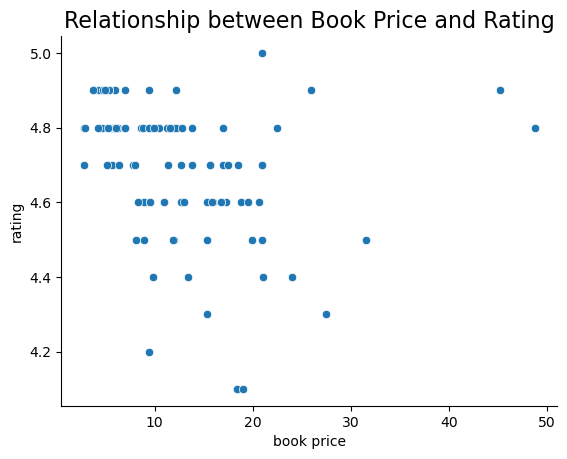

In [584]:
sns.scatterplot(
    x=book_titles['book price'],
    y=book_titles['rating'],
    data=book_titles)

plt.title('Relationship between Book Price and Rating', fontsize=16)

sns.despine()

# BRIEF SUMMARY

# not strong relationship

* JOINTPLOT For finding better relationship

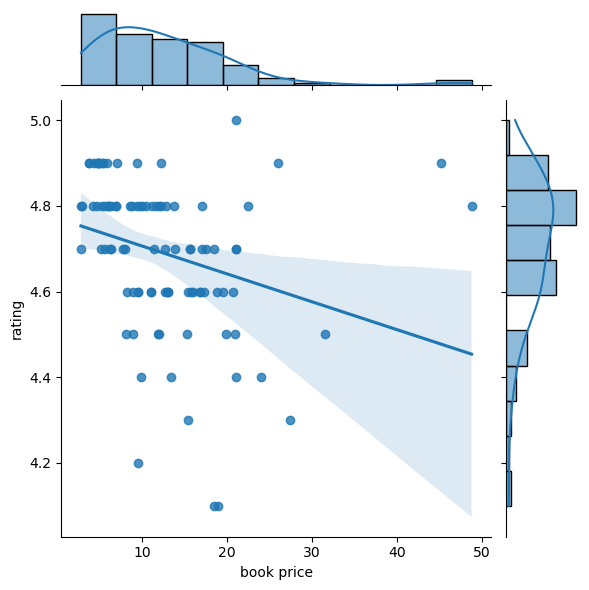

In [595]:
sns.jointplot(
    x='book price',
    y='rating', 
    kind="reg", 
    data=book_titles)

# BRIEF SUMMARY

# again not strong relationship
# most of the data is distributed with the price range from 2-24 and rating 4.6 - 4.9

In [555]:
# checking verified users %
customer_reviews_verified = customer_reviews['is_verified'].value_counts()
customer_reviews_verified = 1-(3/917)
print(customer_reviews_verified)

0.9967284623773174


* VERIFIED REVIEWERS %

Text(0.5, 1.0, '% of Verified Reviewers')

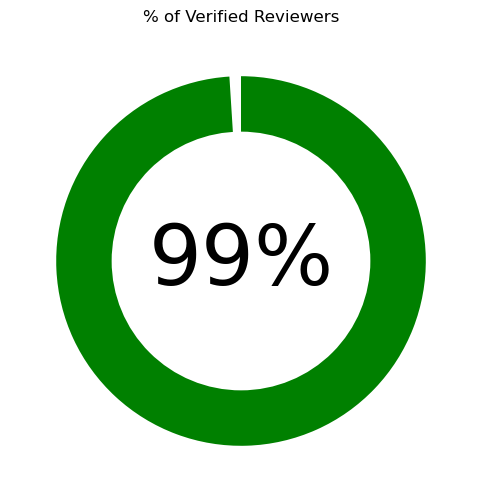

In [553]:
fig,ax = plt.subplots(figsize=(6,6))

ax.pie([.01,.99],
       startangle=90,
       labels = ['',''],
       pctdistance = .85,
       colors=['white','green'])
hole = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(hole)

plt.text(0,
         0,
         '99%',
         ha='center',
         va='center',
         fontsize=60)
ax.set_title('% of Verified Reviewers', fontsize=12)

In [559]:
# creating rating dataframe by year
rating_by_year = book_titles.groupby('year').agg({'rating':'mean'})

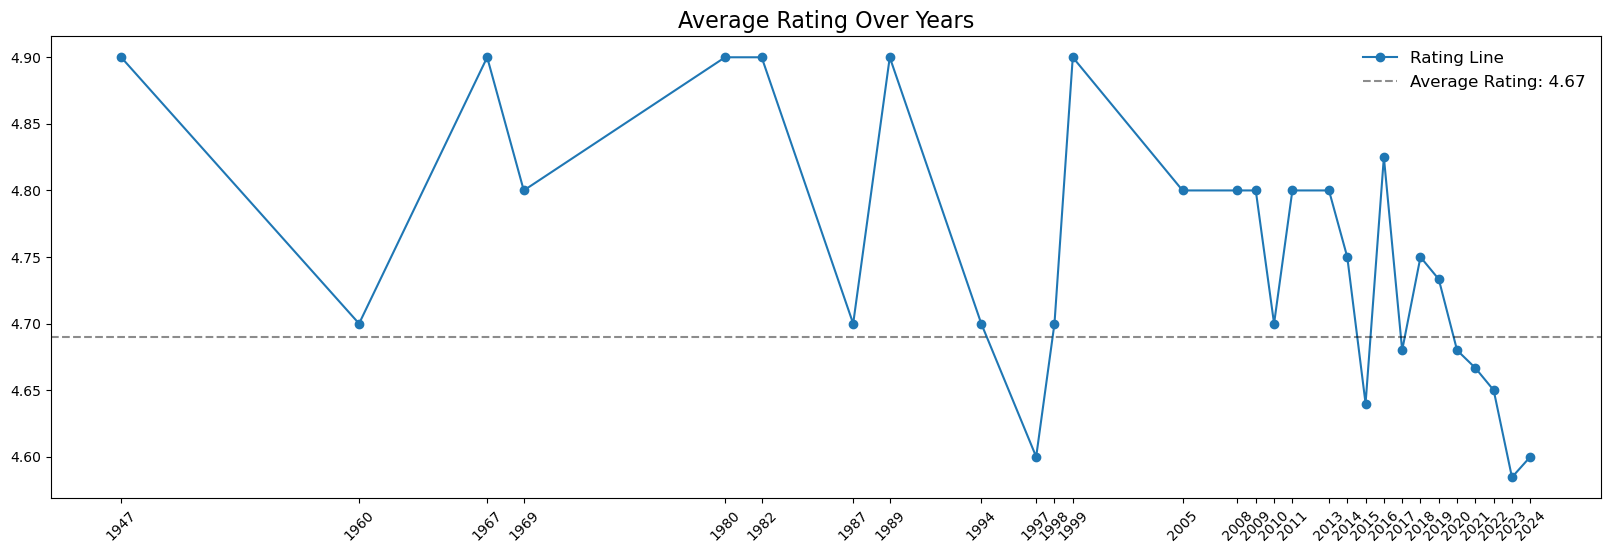

In [582]:
rating_avg = book_titles['rating'].mean()
plt.figure(figsize=(20, 6))
plt.plot(rating_by_year.index, rating_by_year['rating'], marker='o', linestyle='-',label='Rating Line')

plt.axhline(y=rating_avg, linestyle='--', color='black',alpha=.45, label='Average Rating: 4.67')
#plt.ylabel('Average Rating')
plt.title('Average Rating Over Years',fontsize=16)
plt.xticks(rating_by_year.index, rotation=45)

plt.legend(frameon=False,fontsize=12)
#plt.grid(True)
plt.show()

# BRIEF SUMMARY

# newly released books struggling to have more than average rating 

* REVIEWER RATING

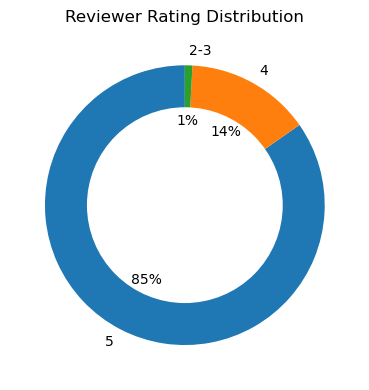

In [652]:
reviewer_ratings = pd.DataFrame(customer_reviews['reviewer rating'].value_counts()).iloc[0:3]

fig, ax = plt.subplots(figsize=(4,4))

ax.pie(x=reviewer_ratings['reviewer rating'],
       startangle=90,
       labels=['5','4','2-3'],
       autopct='%.0f%%')
      #explode=(.1,.1,0))
ax.set_title('Reviewer Rating Distribution')

hole = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()

fig.gca().add_artist(hole)

plt.tight_layout()

# BRIEF SUMMARY

# most of the ratings are either 4 or 5